In [1]:
import pandas as pd

In [3]:
loo = pd.read_csv("/mnt/local/extHDD4/data/maedera-data/maedera-workspace/paper/CLModel-private/outputs/results/230308finding_type_validation_loo_seed123.csv")
com = pd.read_csv("/mnt/local/extHDD4/data/maedera-data/maedera-workspace/paper/CLModel-private/outputs/results/230310TGGATEs_Fscore.csv")
moa = pd.read_csv("/mnt/local/extHDD4/data/maedera-data/maedera-workspace/paper/CLModel-private/outputs/results/23310compound_validation_macro.csv")
prog = pd.read_csv("/mnt/local/extHDD4/data/maedera-data/maedera-workspace/paper/CLModel-private/outputs/230311prognosis_result.csv")

In [4]:
import matplotlib.pyplot as plt

In [7]:
x2

model    layer  
Block 1  Block 1    1022.793123
         Block 2     984.335111
         Block 3     766.795230
         Block 4     722.672689
         Block 5     730.088186
                       ...     
Head     Block 5     829.950424
         Block 6     670.361561
         Block 7     702.641982
         Head        937.387492
         Stem        602.615778
Name: Pseudo F Score (Compound), Length: 90, dtype: float64

ValueError: x and y must be the same size

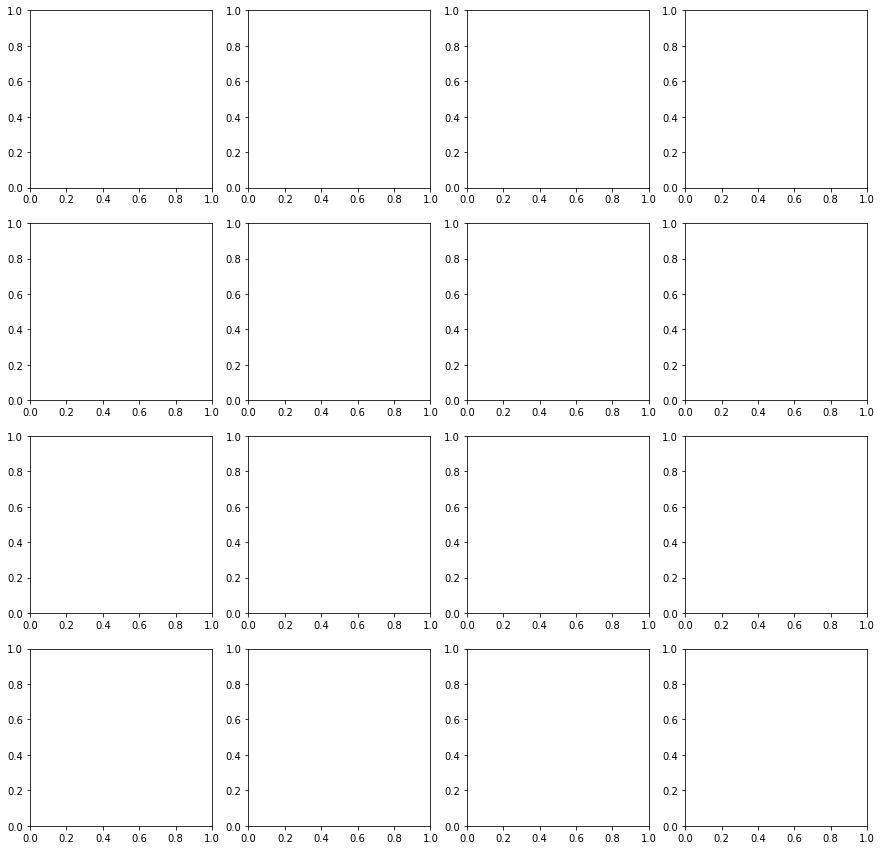

In [5]:
x1 = loo.groupby(by=["model", "layer"]).mean()["AUROC"]
x2 = com.groupby(by=["model", "layer"]).mean()["Pseudo F Score (Compound)"]
x3 = moa.groupby(by=["model", "layer"]).mean()["Balanced Accuracy"][:-1]
x4 = prog.groupby(by=["model", "layer"]).mean()["AUROC"][:-1]

import numpy as np
labels = ["LOO AUROC", "Compound Pseudo F Score", "MoA Balanced Accuracy", "Prognosis AUROC"]
x = [x1,x2,x3,x4]
fig, axes = plt.subplots(4,4, figsize=(15,15))
for i in range(4):
    for j in range(i+1,4):
        ax = axes[i,j]
        ax.scatter(x[j],x[i])
        ax.set_xlabel(labels[j])
        ax.set_ylabel(labels[i])
        ax.set_title(f"Corr. : {np.corrcoef(x[i], x[j])[0,1]:.3f}", fontsize=16)

fig.tight_layout()
#plt.savefig("../../outputs/results/correlations.png", bbox_inches="tight")

model    layer  
Block 1  Block 1    0.412727
         Block 2    0.619209
         Block 3    0.674891
         Block 4    0.725965
         Block 5    0.714916
                      ...   
Head     Block 5    0.711745
         Block 6    0.724786
         Block 7    0.688394
         Head       0.675358
         Stem       0.345998
Name: Balanced Accuracy, Length: 90, dtype: float64

In [26]:
com = pd.read_csv("/mnt/local/extHDD4/data/maedera-data/maedera-workspace/paper/CLModel-private/outputs/results/compound_validation.csv")


In [27]:
com

,Stem,Block 1,Block 2,Block 3,Block 4,Block 5,Block 6,Block 7,Head
0,0.345998,0.413814,0.526049,0.604008,0.709236,0.711745,0.724786,0.688394,0.597996
1,0.345998,0.413814,0.526049,0.604008,0.709236,0.711745,0.724786,0.688394,0.675358
2,0.345998,0.413814,0.526049,0.604008,0.709236,0.711745,0.724786,0.733276,0.652335
3,0.345998,0.413814,0.526049,0.604008,0.709236,0.711745,0.737931,0.741856,0.653201
4,0.345998,0.413814,0.526049,0.604008,0.709236,0.723633,0.740317,0.721730,0.637949
5,0.345998,0.413814,0.526049,0.604008,0.748957,0.741695,0.741036,0.692375,0.618589
6,0.345998,0.413814,0.526049,0.678583,0.730159,0.732025,0.732306,0.717021,0.638674
7,0.345998,0.413814,0.625898,0.659198,0.702434,0.723546,0.735279,0.698901,0.642216
8,0.345998,0.412727,0.619209,0.674891,0.725965,0.714916,0.734533,0.674421,0.596368
9,0.397008,0.438196,0.626499,0.651650,0.712017,0.691386,0.746302,0.771642,0.658195
